In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [3]:
data_title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')

In [4]:
data_title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [5]:
data_title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')

In [6]:
data_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [7]:
## Merged imdb.title.basics.csv.gz and imdb.title.ratings.csv.gz on the column 'tconst' with an inner join to eliminate 
## non-matching items.
data_title_overall = pd.merge(data_title_basics, data_title_ratings, on='tconst', how='inner')

In [8]:
## Renamed 'primary_title' to 'title' in order to smoothly merge this dataframe with bom.movie_gross.csv.gz.
data_title_overall = data_title_overall.rename(columns={'primary_title': 'title'})

In [9]:
## Merged IMDB and BOM data into one dataframe
movie_titles = pd.merge(data_movie_gross, data_title_overall, on='title', how='inner')

In [10]:
movie_titles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 0 to 3026
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3027 non-null   object 
 1   studio           3024 non-null   object 
 2   domestic_gross   3005 non-null   float64
 3   foreign_gross    1832 non-null   object 
 4   year             3027 non-null   int64  
 5   tconst           3027 non-null   object 
 6   original_title   3027 non-null   object 
 7   start_year       3027 non-null   int64  
 8   runtime_minutes  2980 non-null   float64
 9   genres           3020 non-null   object 
 10  averagerating    3027 non-null   float64
 11  numvotes         3027 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 307.4+ KB


In [11]:
movie_titles = movie_titles[['title', 'studio', 'domestic_gross', 'foreign_gross', 'year', 'genres', 'averagerating']]

In [12]:
movie_titles.dropna(axis=0, how='any', inplace=True)

In [13]:
movie_titles['foreign_gross'] = movie_titles.foreign_gross.str.split(',').str.join('').astype(float)

In [14]:
movie_titles['total_gross'] = movie_titles['domestic_gross'] + movie_titles['foreign_gross']
pd.options.display.float_format = '{:.4f}'.format

In [15]:
movie_titles.head()

,title,studio,domestic_gross,foreign_gross,year,genres,averagerating,total_gross
0,Toy Story 3,BV,415000000.0000,652000000.0000,2010,"Adventure,Animation,Comedy",8.3000,1067000000.0000
1,Inception,WB,292600000.0000,535700000.0000,2010,"Action,Adventure,Sci-Fi",8.8000,828300000.0000
2,Shrek Forever After,P/DW,238700000.0000,513900000.0000,2010,"Adventure,Animation,Comedy",6.3000,752600000.0000
3,The Twilight Saga: Eclipse,Sum.,300500000.0000,398000000.0000,2010,"Adventure,Drama,Fantasy",5.0000,698500000.0000
4,Iron Man 2,Par.,312400000.0000,311500000.0000,2010,"Action,Adventure,Sci-Fi",7.0000,623900000.0000


In [16]:
movie_titles_genres = movie_titles[['title', 'studio', 'genres', 'total_gross', 'year']]

In [17]:
movie_titles_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1803 entries, 0 to 3001
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        1803 non-null   object 
 1   studio       1803 non-null   object 
 2   genres       1803 non-null   object 
 3   total_gross  1803 non-null   float64
 4   year         1803 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 84.5+ KB


In [18]:
movie_titles_genres.head()

,title,studio,genres,total_gross,year
0,Toy Story 3,BV,"Adventure,Animation,Comedy",1067000000.0000,2010
1,Inception,WB,"Action,Adventure,Sci-Fi",828300000.0000,2010
2,Shrek Forever After,P/DW,"Adventure,Animation,Comedy",752600000.0000,2010
3,The Twilight Saga: Eclipse,Sum.,"Adventure,Drama,Fantasy",698500000.0000,2010
4,Iron Man 2,Par.,"Action,Adventure,Sci-Fi",623900000.0000,2010


In [19]:
def count_genre(x):
    data_plot = movie_titles_genres[x].str.cat(sep = ',')
    data = pd.Series(data_plot.split(','))
    info = data.value_counts(ascending=False)
    return info

In [20]:
total_genre_movies = count_genre('genres')
total_genre_movies

Drama          950
Comedy         604
Action         464
Adventure      368
Thriller       292
Romance        255
Crime          243
Biography      160
Horror         159
Mystery        133
Fantasy        129
Animation      123
Sci-Fi         113
Documentary     86
Family          86
History         80
Music           49
Sport           35
War             20
Western         11
Musical         10
News             1
dtype: int64

Text(0, 0.5, 'Genres')

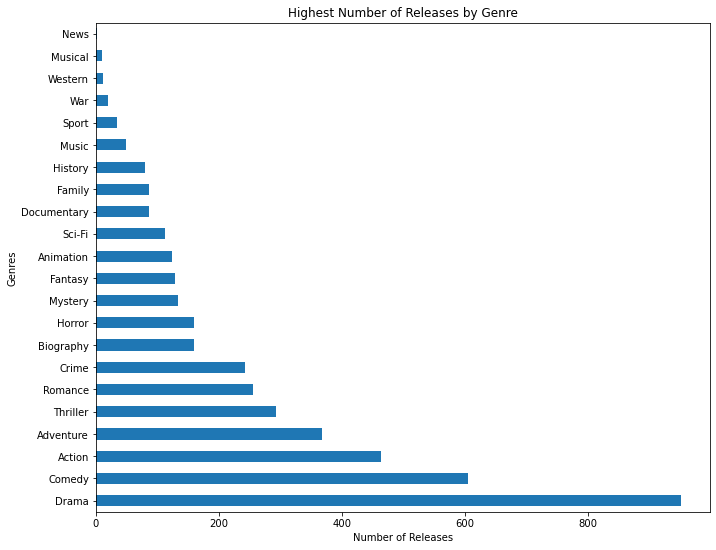

In [21]:
total_genre_movies.plot(kind='barh', figsize=(11,9))
plt.title('Highest Number of Releases by Genre')
plt.xlabel('Number of Releases')
plt.ylabel('Genres')


In [22]:
unique_genres = movie_titles_genres.genres.unique()
movie_genres_list = []

for x in unique_genres:
    movie_genres_list.extend(x.split(','))

movie_genres = (list(set(movie_genres_list)))
movie_genres = sorted(movie_genres)

In [23]:
genre_details = list(map(str, (movie_titles_genres['genres'])))
genre_list = movie_genres

In [24]:
year = np.array(movie_titles_genres['year'])
profit = np.array(movie_titles_genres['total_gross'])

In [26]:
profit_df = pd.DataFrame(index = genre_list, columns = range(2010, 2018))
profit_df.fillna(value = 0.0)

z = 0
for i in genre_details:
    split_genre = list(map(str, i.split(',')))
    profit_df.loc[split_genre, year[z]] = profit_df.loc[split_genre, year[z]] + profit[z]
    z+=1

KeyError: 2018